# 1. Random Variables

# Q1. (Mandatory)


In [2]:
import torch
from torch.distributions import Categorical

dice = Categorical(torch.ones(6) / 6)

def roll_dice():
    a = dice.sample().item() + 1
    b = dice.sample().item() + 1
    return a + b

def simulate_rolls(n=10000):
    count_7 = 0
    count_2_or_12 = 0
    for _ in range(n):
        r = roll_dice()
        if r == 7:
            count_7 += 1
        if r == 2 or r == 12:
            count_2_or_12 += 1
    p1 = count_7 / n
    p2 = count_2_or_12 / n
    
    print("Experimental probability of sum 7:", round(p1, 3))
    print("Experimental probability of sum 2 or 12:", round(p2, 3))
    print(" ")
    print("Theoretical probability of sum 7: 6/36 = 0.167")
    print("Theoretical probability of sum 2 or 12: 2/36 = 0.056")

simulate_rolls()

Experimental probability of sum 7: 0.166
Experimental probability of sum 2 or 12: 0.056
 
Theoretical probability of sum 7: 6/36 = 0.167
Theoretical probability of sum 2 or 12: 2/36 = 0.056


# Q2. (Optional)

In [3]:
import torch
from torch.distributions import Bernoulli

coin = Bernoulli(probs=0.5)

def coin_toss(n):
    flips = []
    for _ in range(n):
        toss = int(coin.sample().item())
        if toss == 1:
            flips.append('H')
        else:
            flips.append('T')
    return flips

def count_heads(flips):
    count = 0
    for i in flips:
        if i == 'H':
            count += 1
    return count

tosses = coin_toss(10)
num_heads = count_heads(tosses)

print("Coin tosses:", tosses)
print("Number of heads:", num_heads)

Coin tosses: ['T', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H']
Number of heads: 7


# Q3. (Optional)

In [4]:
import torch
from torch.distributions import Bernoulli

coin = Bernoulli(probs=0.5)

def coin_toss(n):
    flips = []
    for _ in range(n):
        toss = int(coin.sample().item())
        if toss == 1:
            flips.append('H')
        else:
            flips.append('T')
    return flips

def count_heads(flips):
    count = 0
    for i in flips:
        if i == 'H':
            count += 1
    return count

flips = coin_toss(4)
num_heads_4 = count_heads(flips)

print("Coin tosses:", flips)
print("Number of heads:", num_heads_4)

def check_inverse_mapping(flips, a):
    if count_heads(flips) == a:
        print(f"X(ξ) = {a} is True")
    else:
        print(f"X(ξ) = {a} is False")

check_inverse_mapping(flips, 2)

Coin tosses: ['H', 'T', 'T', 'T']
Number of heads: 1
X(ξ) = 2 is False


# 2. Probalility Mass function

# Q1. (Mandatory)

In [5]:
import torch

def is_valid_pmf():
    x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float)
    fx = x**2 - 6*x + 10
    if torch.all(fx >= 0):
        total = fx.sum()
        c = 1 / total
        prob_sum = (c * fx).sum()
        if round(prob_sum.item(), 3) == 1.0:
            print("The function is a valid PMF with c =", round(c.item(), 3))
            return round(c.item(), 3)
        else:
            print("Sum of probabilities is", round(prob_sum.item(), 3), "which is not equal to 1.")
            return None
    else:
        print("Function has negative values. Not a valid PMF.")
        return None

is_valid_pmf()

The function is a valid PMF with c = 0.067


0.067

# Q2. (Optional) 

In [2]:
import torch
import pandas as pd
import numpy as np
def simulate_coin_flip(number_of_trials,p,size):
    pmf = {}
    dist = torch.distributions.Binomial(total_count = number_of_trials, probs = p)
    heads = dist.sample((size,)).int().numpy()
    head_count, count = np.unique(heads,return_counts = True)
    empirical_pmf = count/size
    for i, j in zip(head_count, empirical_pmf):
        pmf[f'{i.item()} Heads'] = j.item()
    data = pd.DataFrame(list(pmf.items()),columns = ["Number of Heads", "Probability"])
    return data
simulate_coin_flip(100,0.5,1000)

,Number of Heads,Probability
0,35 Heads,0.001
1,37 Heads,0.003
2,38 Heads,0.002
3,39 Heads,0.010
4,40 Heads,0.011
5,41 Heads,0.018
6,42 Heads,0.017
7,43 Heads,0.034
8,44 Heads,0.033
9,45 Heads,0.046


# Q3. (Optional)

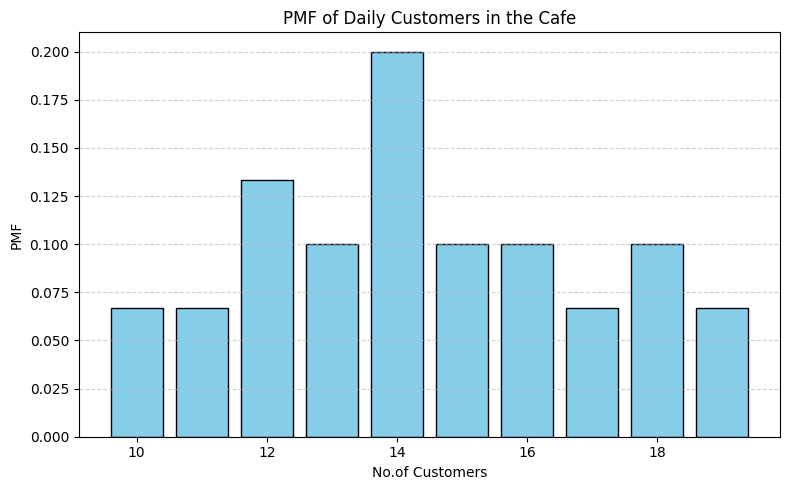

The most common number of daily customers is: 14


In [7]:
import torch
import matplotlib.pyplot as plt

customer_counts = torch.tensor([12, 15, 14, 10, 18, 16, 14, 12, 15, 11, 
                                17, 14, 13, 19, 12, 18, 14, 10, 16, 15, 
                                14, 13, 17, 12, 18, 16, 14, 11, 19, 13])

unique_counts, counts = torch.unique(customer_counts, return_counts=True)
pmf = counts.float() / customer_counts.size(0)

plt.figure(figsize=(8, 5))
plt.bar(unique_counts.tolist(), pmf.tolist(), color='skyblue', edgecolor='black')
plt.xlabel("No.of Customers")
plt.ylabel("PMF")
plt.title("PMF of Daily Customers in the Cafe")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

most_common = unique_counts[torch.argmax(pmf)].item()
print("The most common number of daily customers is:", most_common)

# 3. Cumulative Distribution Function

# Q1. (Mandatory)

In [8]:
import torch

x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float)
pmf = x / 15

cdf = torch.cumsum(pmf, dim=0)


for i in range(len(x)):
    print(f"x = {int(x[i])},\tPMF = {round(pmf[i].item(), 3)},\tCDF = {round(cdf[i].item(), 3)}")

print("\nVerifying the relationship between PMF and CDF:\n")
print(f"P(X=1) = {round(pmf[0].item(), 3)}, F(1) = {round(cdf[0].item(), 3)}")
for i in range(1, len(x)):
    diff = cdf[i] - cdf[i - 1]
    print(f"P(X={int(x[i])}) = {round(pmf[i].item(), 3)}, F({int(x[i])}) - F({int(x[i]-1)}) = {round(diff.item(), 3)}")

x = 1,	PMF = 0.067,	CDF = 0.067
x = 2,	PMF = 0.133,	CDF = 0.2
x = 3,	PMF = 0.2,	CDF = 0.4
x = 4,	PMF = 0.267,	CDF = 0.667
x = 5,	PMF = 0.333,	CDF = 1.0

Verifying the relationship between PMF and CDF:

P(X=1) = 0.067, F(1) = 0.067
P(X=2) = 0.133, F(2) - F(1) = 0.133
P(X=3) = 0.2, F(3) - F(2) = 0.2
P(X=4) = 0.267, F(4) - F(3) = 0.267
P(X=5) = 0.333, F(5) - F(4) = 0.333


# Q2. (Optional)

CDF values for a biased 6-sided die:
X ≤ 1 : 0.05
X ≤ 2 : 0.15
X ≤ 3 : 0.3
X ≤ 4 : 0.5
X ≤ 5 : 0.75
X ≤ 6 : 1.0


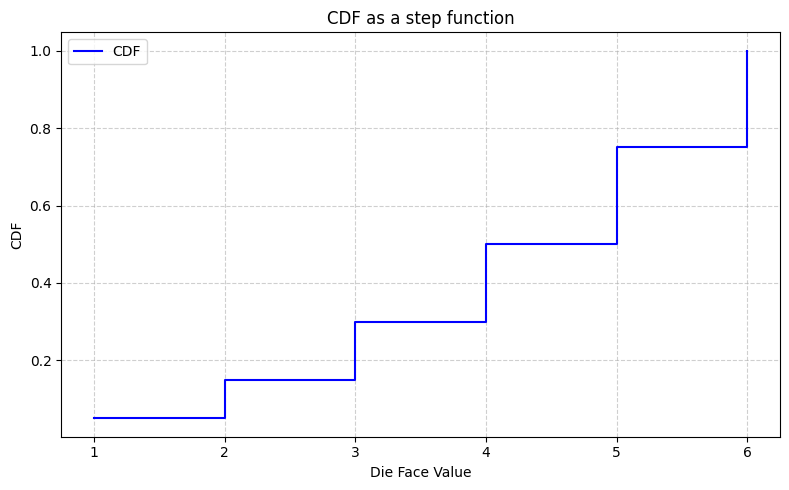

In [9]:
import torch
import matplotlib.pyplot as plt

def compute_cdf(values, pmf):
    values = torch.tensor(values, dtype=torch.float)
    pmf = torch.tensor(pmf, dtype=torch.float)
    sorted_vals, indices = torch.sort(values)
    sorted_pmf = pmf[indices]
    cdf = torch.cumsum(sorted_pmf, dim=0)
    return sorted_vals.tolist(), cdf.tolist()

values = [3, 1, 6, 2, 5, 4]
pmf = [0.15, 0.05, 0.25, 0.10, 0.25, 0.20]

sorted_vals, cdf_vals = compute_cdf(values, pmf)

print("CDF values for a biased 6-sided die:")
for val, prob in zip(sorted_vals, cdf_vals):
    print(f"X ≤ {int(val)} : {round(prob, 3)}")

plt.figure(figsize=(8, 5))
plt.step(sorted_vals, cdf_vals, where='post', color='blue', label='CDF')
plt.xlabel("Die Face Value")
plt.ylabel("CDF")
plt.title("CDF as a step function")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(sorted(sorted_vals))
plt.legend()
plt.tight_layout()
plt.show()

# Q3. (Optional)

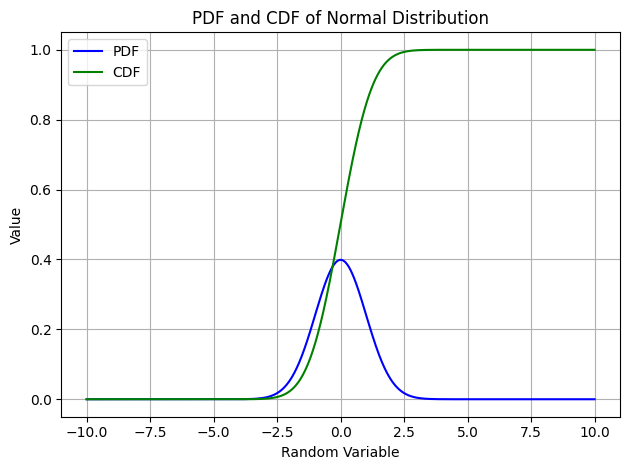

In [10]:
import torch
import matplotlib.pyplot as plt

def pdf(x, mu, sigma):
    return (1 / (torch.sqrt(torch.tensor(2 * torch.pi)) * sigma)) * torch.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

x = torch.linspace(-10, 10, 1000)
mu = 0.0
sigma = 1.0
pdf_values = pdf(x, mu, sigma)
cdf_values = torch.cumsum(pdf_values, dim=0) * (x[1] - x[0])  #HOW TO APPLY INTEGRATION ?

plt.plot(x, pdf_values, label='PDF', color='blue')
plt.plot(x, cdf_values, label='CDF', color='green')
plt.xlabel('Random Variable')
plt.ylabel('Value')
plt.title('PDF and CDF of Normal Distribution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Expectation

# Q1. (Mandatory) 

In [11]:
import torch

trials = 10000
flips = torch.randint(0, 2, (trials, 3))
heads = flips.sum(dim=1)

rewards = torch.where(heads == 3, 8.0, torch.where(heads == 2, 1.0, 0.0))
net_gains = rewards - 1.5
average_net_gain = net_gains.mean().item()

theoretical_expected_net_gain = (1/8)*8 + (3/8)*1 - 1.5

print("Average Net Gain:", round(average_net_gain, 3))
print("Theoretical Expected Net Gain:", round(theoretical_expected_net_gain, 3))


Average Net Gain: -0.122
Theoretical Expected Net Gain: -0.125


# Q2. (Optional)


In [12]:
import torch

def compute_expected_value(pmf):
    outcomes = torch.tensor(list(pmf.keys()), dtype=torch.int64)
    probabilities = torch.tensor(list(pmf.values()), dtype=torch.float)
    return (outcomes * probabilities).sum().item()

pmf = {1: 0.2, 2: 0.3, 3: 0.5}
expected_value = compute_expected_value(pmf)
print("Expected value:", round(expected_value, 3))

Expected value: 2.3


# Q3. (Optional)

In [13]:
import torch

def compute_expected_value_of_function(pmf, g):
    outcomes = torch.tensor(list(pmf.keys()), dtype=torch.int64)
    probabilities = torch.tensor(list(pmf.values()), dtype=torch.float)
    gx = g(outcomes)
    expected_value = torch.sum(gx * probabilities)
    return expected_value

pmf = {1: 0.2, 2: 0.3, 3: 0.5}
g = lambda x: x**2

expected_value = compute_expected_value_of_function(pmf, g)
print("Expected value of a function g(x): ", round(expected_value.item(), 3))

Expected value of a function g(x):  5.9


# 5. Moments and Variance

# Q1. (Mandatory)

In [14]:
import torch

def compute_variance(pmf):
    outcomes = torch.tensor(list(pmf.keys()), dtype=torch.int64)
    probabilities = torch.tensor(list(pmf.values()), dtype=torch.float)
    mean = torch.sum(outcomes * probabilities)
    squared_diff = (outcomes - mean) ** 2
    variance = torch.sum(squared_diff * probabilities)
    return variance

pmf = {1: 0.2, 2: 0.3, 3: 0.5}
variance = compute_variance(pmf)
print("Variance: ", round(variance.item(), 3))

Variance:  0.61


# Q2. (Optional)

In [15]:
import torch

def compute_moment(pmf, k):
    outcomes = torch.tensor(list(pmf.keys()), dtype=torch.int64)
    probabilities = torch.tensor(list(pmf.values()), dtype=torch.float)
    moment = torch.sum((outcomes ** k) * probabilities)
    return moment

pmf = {1: 0.2, 2: 0.3, 3: 0.5}
k = 3
moment = compute_moment(pmf, k)
print("k-th Moment: ", round(moment.item(), 3))

k-th Moment:  16.1


# Q3. (Optional)

In [16]:
import torch

def estimate_variance(f, a, b, N):
    dist = torch.distributions.Uniform(a, b)
    x = dist.sample((N,))
    fx = f(x)
    return fx.var(unbiased=False) #IMP TO NOTICE

f = lambda x: x**2
a, b, N = 0, 1, 10000
variance = estimate_variance(f, a, b, N)
print("Variance of given function f(x): ", round(variance.item(), 3))

Variance of given function f(x):  0.089


# 6. Bernoulli Random Variables

# Q1. (Mandatory) (Doubt)

In [21]:
import torch

def bernoulli_trial(p):
    return int(torch.bernoulli(torch.tensor(p)).item())

p = 0.7
outcome = bernoulli_trial(p)
print("Outcome: ", outcome)

Outcome:  1


# Q2. (Optional)

In [26]:
import torch

def bernoulli_stats(p):
    p = torch.tensor(p)
    expectation = p
    variance = p * (1 - p)
    return expectation.item(), variance.item()

p = 0.5
expectation, variance = bernoulli_stats(p)
print(f"Expectation: {expectation}, Variance: {variance}")

Expectation: 0.5, Variance: 0.25


# Q3. (Optional)

In [36]:
import torch

def simulate_bernoulli(p, N):
    samples = torch.bernoulli(torch.full((N,), p))
    proportion = samples.mean()
    return proportion.item()

p = 0.3
N = 1000
proportion = simulate_bernoulli(p, N)
print("Proportion of Successes: ", round(proportion, 3))

Proportion of Successes:  0.309
